In [5]:
!pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
matplotlib.rcParams["figure.figsize"]=(20,10)
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
import warnings
warnings.filterwarnings("ignore")
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [13]:
df1=pd.read_csv("iaqdataset2.csv", encoding="utf-8").copy()
df1.head()

,dnt,Temp,Pressure,Humidnity,IAQ
0,09-Oct-2023 08:05:08,33.10,100465,74.68,60.81
1,09-Oct-2023 08:05:11,33.17,100465,73.09,85.97
2,09-Oct-2023 08:05:15,33.36,100465,72.22,86.42
3,09-Oct-2023 08:05:18,33.51,100466,71.47,86.73
4,09-Oct-2023 08:05:21,33.57,100466,70.72,87.06


In [14]:
df1=df1.loc[1:]
df1.head()

,dnt,Temp,Pressure,Humidnity,IAQ
1,09-Oct-2023 08:05:11,33.17,100465,73.09,85.97
2,09-Oct-2023 08:05:15,33.36,100465,72.22,86.42
3,09-Oct-2023 08:05:18,33.51,100466,71.47,86.73
4,09-Oct-2023 08:05:21,33.57,100466,70.72,87.06
5,09-Oct-2023 08:05:25,33.94,100460,72.36,87.12


In [15]:
df1.dnt=pd.to_datetime(df1.dnt,dayfirst="True")
df1.set_index("dnt",inplace=True)
df1.asfreq('h')
df1.head()

,Temp,Pressure,Humidnity,IAQ
dnt,,,,
2023-10-09 08:05:11,33.17,100465,73.09,85.97
2023-10-09 08:05:15,33.36,100465,72.22,86.42
2023-10-09 08:05:18,33.51,100466,71.47,86.73
2023-10-09 08:05:21,33.57,100466,70.72,87.06
2023-10-09 08:05:25,33.94,100460,72.36,87.12


In [16]:
print(df1.isnull().sum)
print(df1.shape)
print(df1.dtypes)

<bound method NDFrame._add_numeric_operations.<locals>.sum of                       Temp  Pressure  Humidnity    IAQ
dnt                                                   
2023-10-09 08:05:11  False     False      False  False
2023-10-09 08:05:15  False     False      False  False
2023-10-09 08:05:18  False     False      False  False
2023-10-09 08:05:21  False     False      False  False
2023-10-09 08:05:25  False     False      False  False
...                    ...       ...        ...    ...
2023-10-09 16:42:19  False     False      False  False
2023-10-09 16:42:22  False     False      False  False
2023-10-09 16:42:26  False     False      False  False
2023-10-09 16:42:29  False     False      False  False
2023-10-09 16:42:33  False     False      False  False

[8208 rows x 4 columns]>
(8208, 4)
Temp         float64
Pressure       int64
Humidnity    float64
IAQ          float64
dtype: object


In [17]:
df1.describe()

,Temp,Pressure,Humidnity,IAQ
count,8208.000000,8208.000000,8208.000000,8208.000000
mean,38.679803,100368.032407,53.924716,94.193277
std,0.932902,172.016951,2.579945,1.077130
min,33.170000,100043.000000,49.830000,85.690000
25%,38.040000,100164.000000,52.310000,93.710000
50%,38.940000,100432.000000,53.190000,94.500000
75%,39.360000,100537.000000,55.080000,94.870000
max,40.270000,100557.000000,74.600000,95.900000


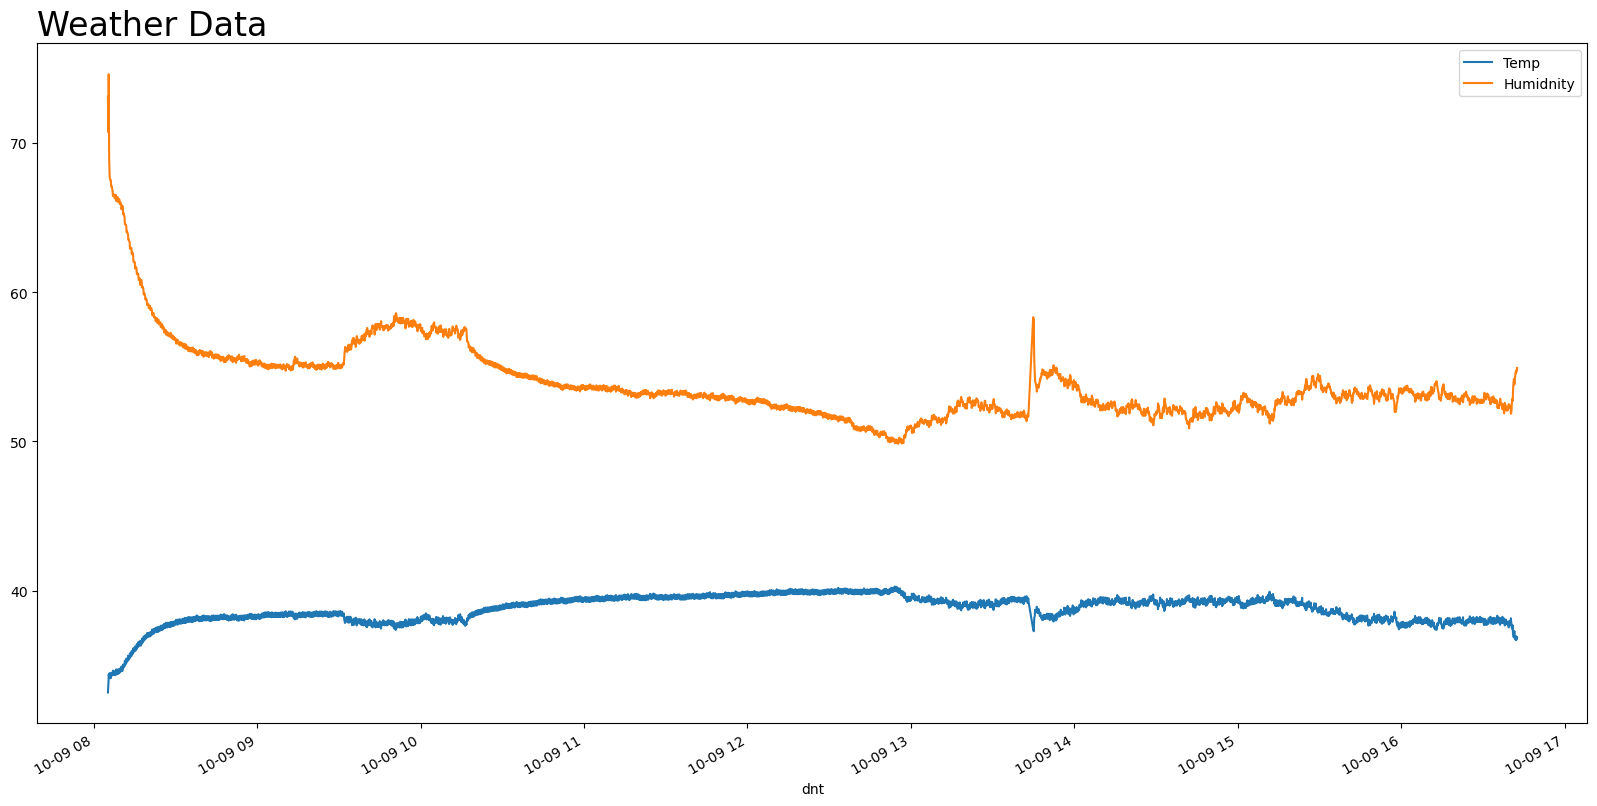

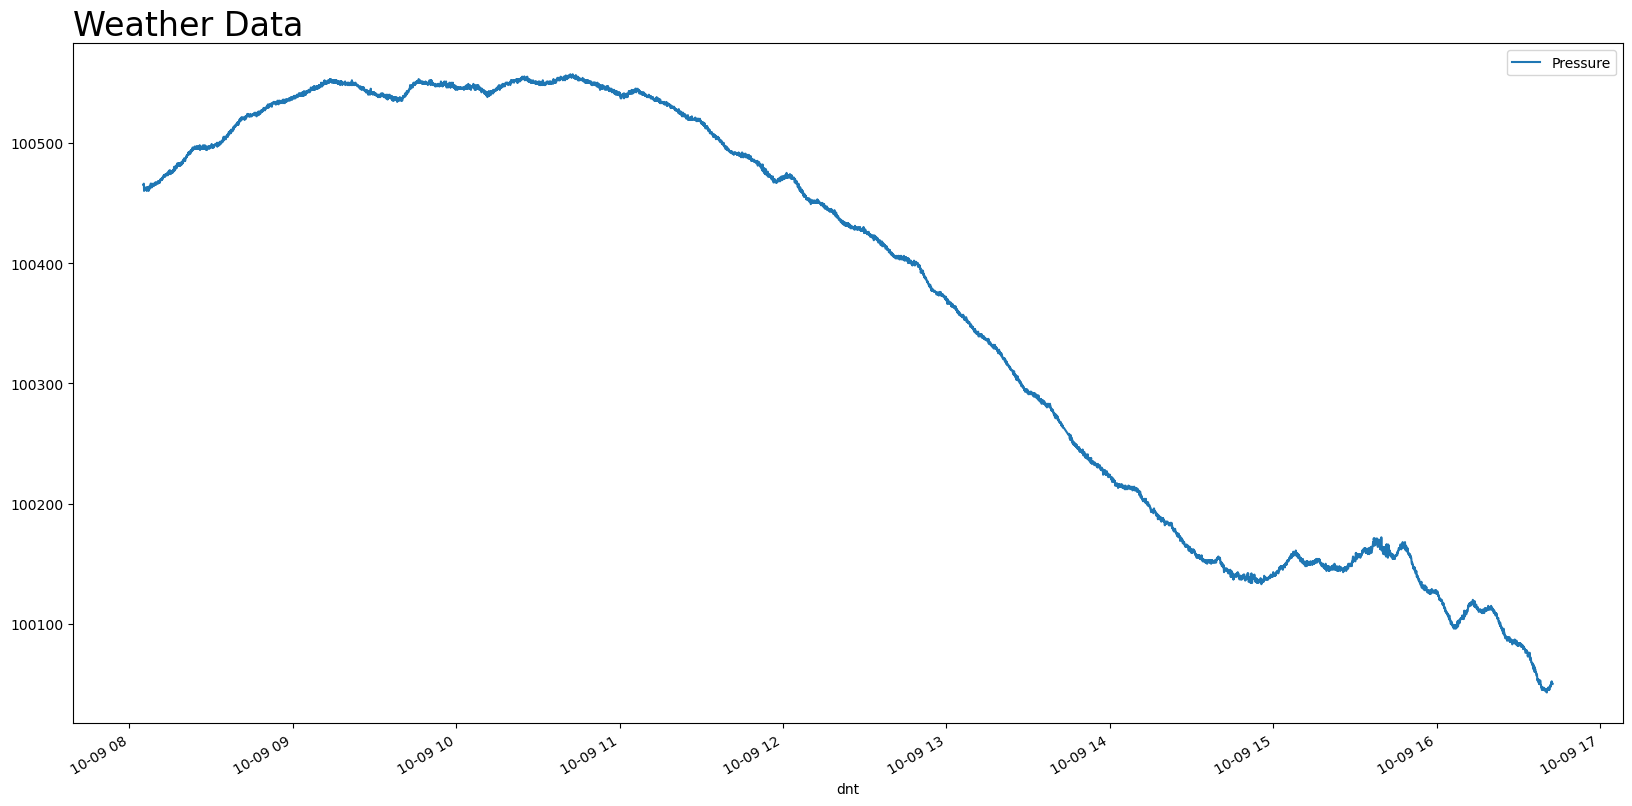

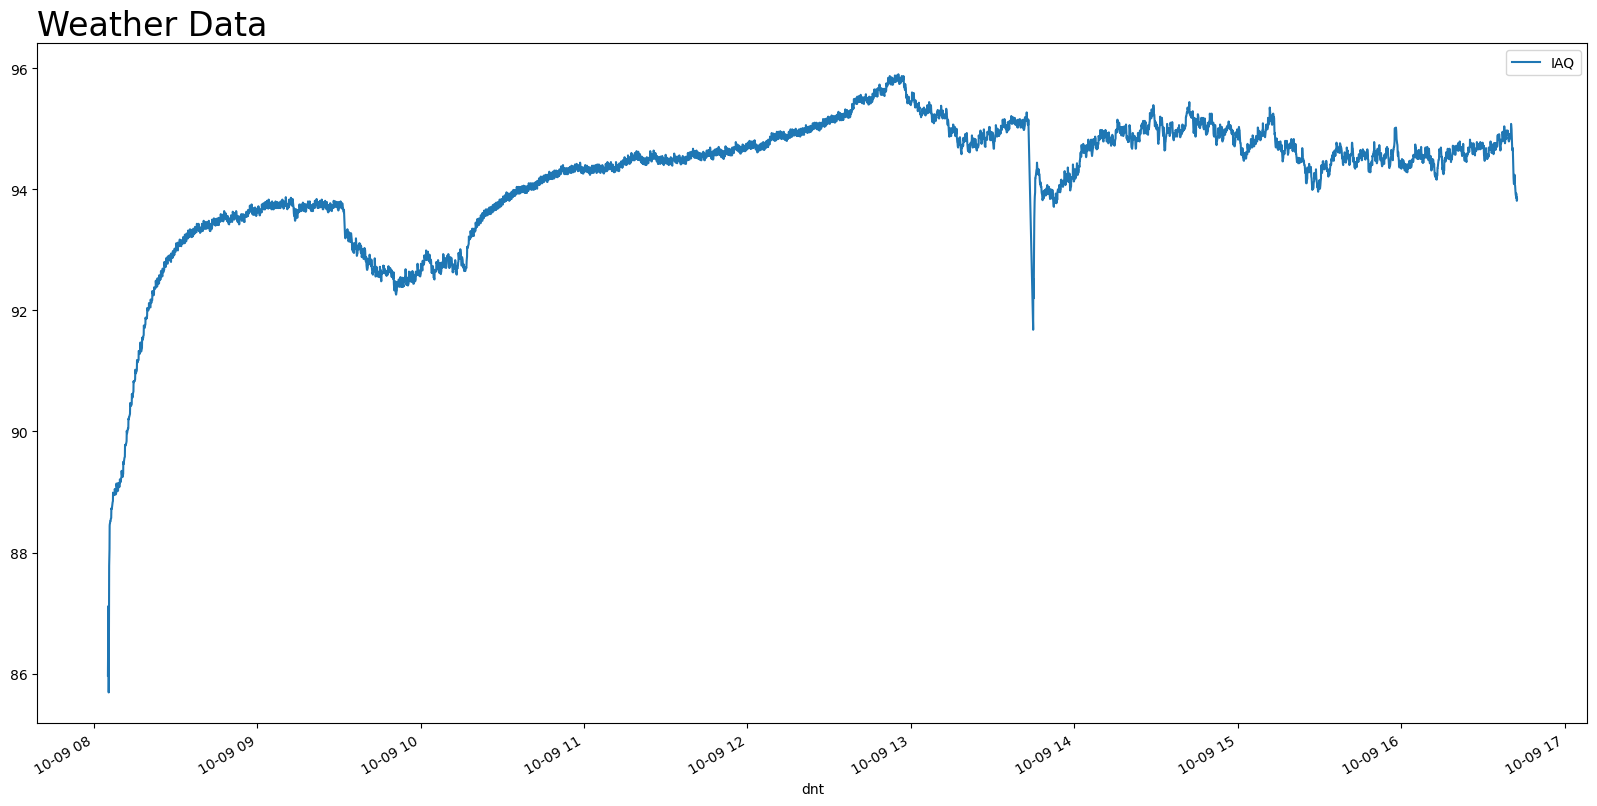

In [18]:
df1["Temp"].plot()
df1.Humidnity.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["Temp","Humidnity"])
plt.show()

df1.Pressure.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["Pressure"])
plt.show()

df1.IAQ.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["IAQ"])
plt.show()

In [19]:
df1.tail()

,Temp,Pressure,Humidnity,IAQ
dnt,,,,
2023-10-09 16:42:19,36.70,100052,54.70,93.89
2023-10-09 16:42:22,36.73,100051,54.76,93.85
2023-10-09 16:42:26,36.80,100051,54.73,93.87
2023-10-09 16:42:29,36.83,100050,54.81,93.81
2023-10-09 16:42:33,36.87,100050,54.92,93.83


In [20]:
sts.adfuller(df1.IAQ)

(-7.0293935455931935,
 6.242030124421744e-10,
 37,
 8170,
 {'1%': -3.4311506555422264,
  '5%': -2.8618938333950203,
  '10%': -2.566958340736701},
 -26229.76507535593)

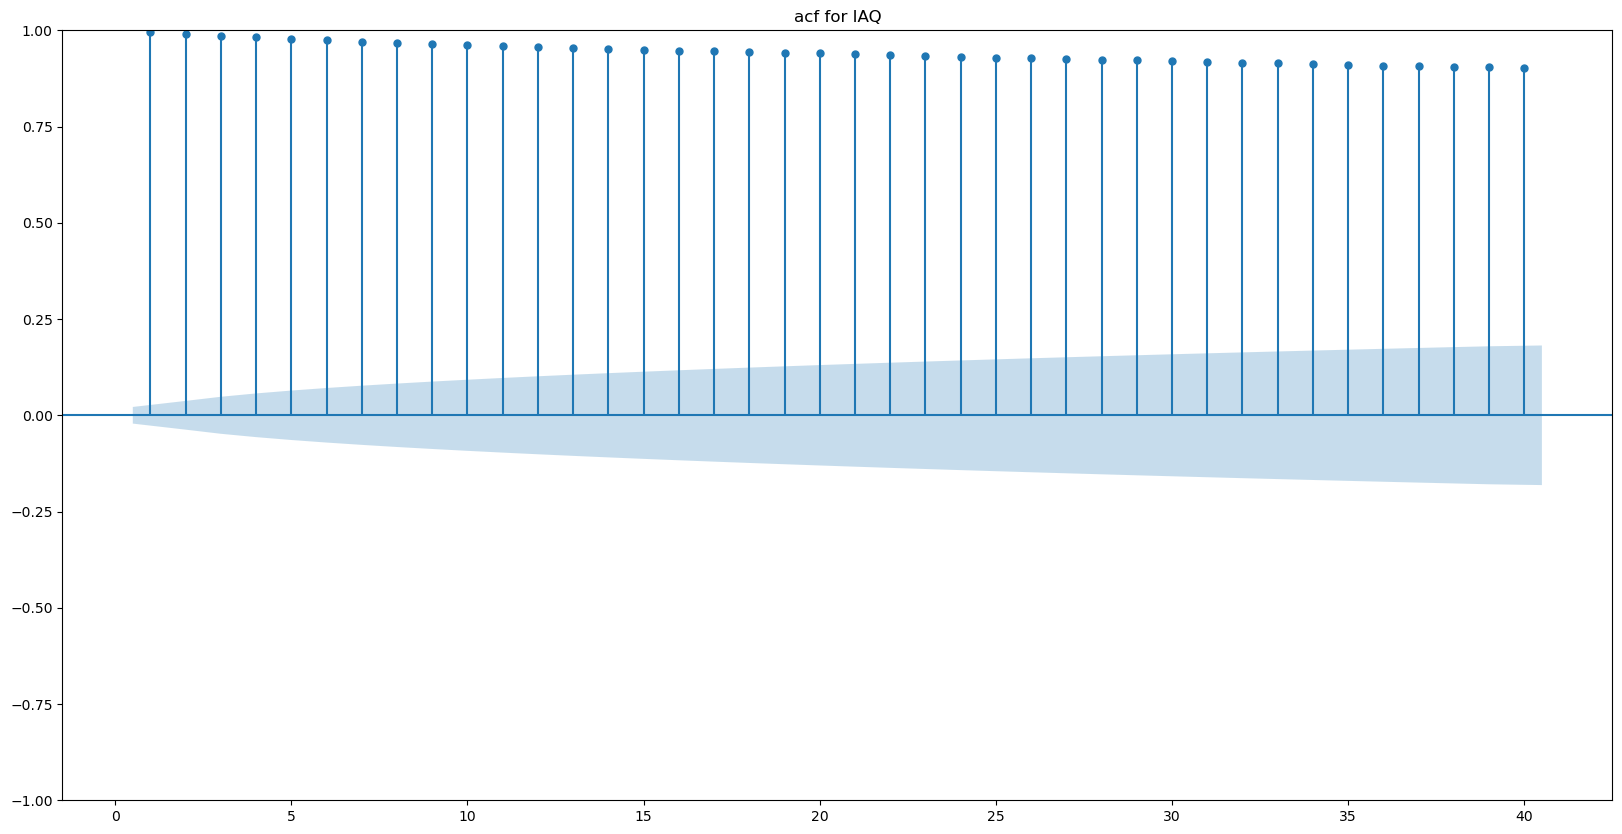

In [21]:
sgt.plot_acf(df1.IAQ,lags=40,zero=False)
plt.title("acf for IAQ")
plt.show()

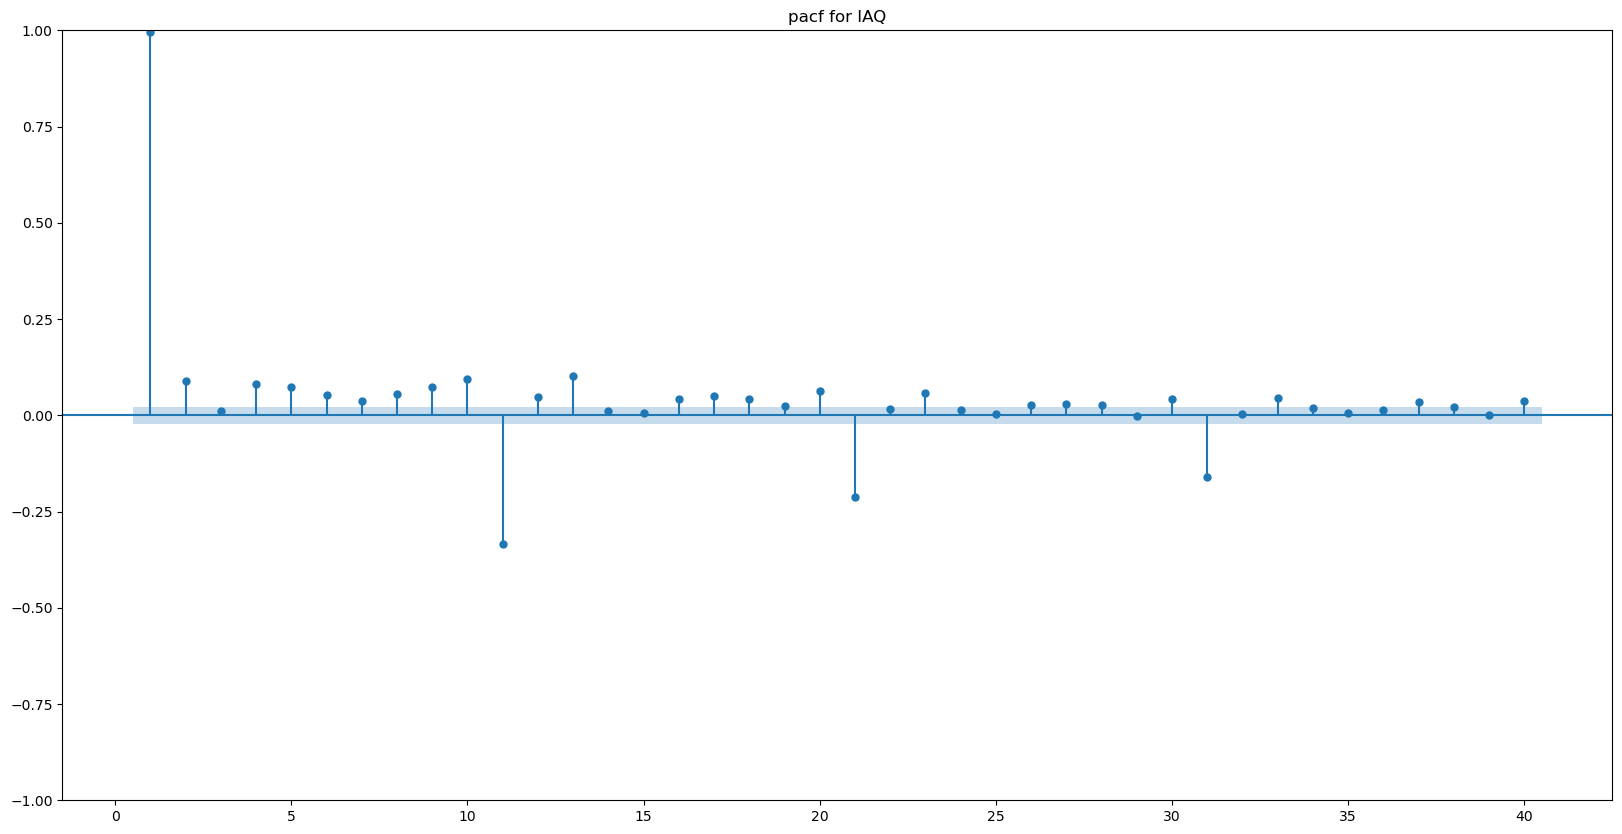

In [22]:
sgt.plot_pacf(df1.IAQ,lags=40,zero=False,method=("ols"))
plt.title("pacf for IAQ")
plt.show()

In [10]:
model_auto = auto_arima(df1.IAQ[1:], seasonal=True, m=5,max_order=None, max_p=6,max_q=6,max_d=3,max_P=3,max_Q=3,max_D=3,maxiter=50)  


KeyboardInterrupt: 

In [11]:
model_auto.summary()
P, D, Q, _ = model_auto.get_params()['seasonal_order']
print(f'Seasonal P: {P}')
print(f'Seasonal D: {D}')
print(f'Seasonal Q: {Q}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8665
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -3173.503
Date:                Wed, 11 Oct 2023   AIC                           6357.006
Time:                        23:08:59   BIC                           6392.341
Sample:                             0   HQIC                          6369.053
                               - 8665                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9049      0.046     19.855      0.000       0.816       0.994
ma.L1         -1.6546      0.046    -36.020      0.000      -1.745      -1.565
ma.L2          0.6624      0.034     19.615      0.000       0.596       0.729
ma.L3          0.0061      0.005      1.291      0.197      -0.003       0.015
sigma2         0.1218   7.47e-05   1630.443      0.000       0.122       0.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):       20956855190.55
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                           -84.64
Prob(H) (two-sided):                  0.00   Kurtosis:                      7620.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
pd.DataFrame(model_auto.predict(start="09-Oct-2023 16:42:36",end="09-Oct-2023 16:43:50"))["":""].plot()

TypeError: cannot do slice indexing on RangeIndex with these indexers [] of type str

<Axes: >

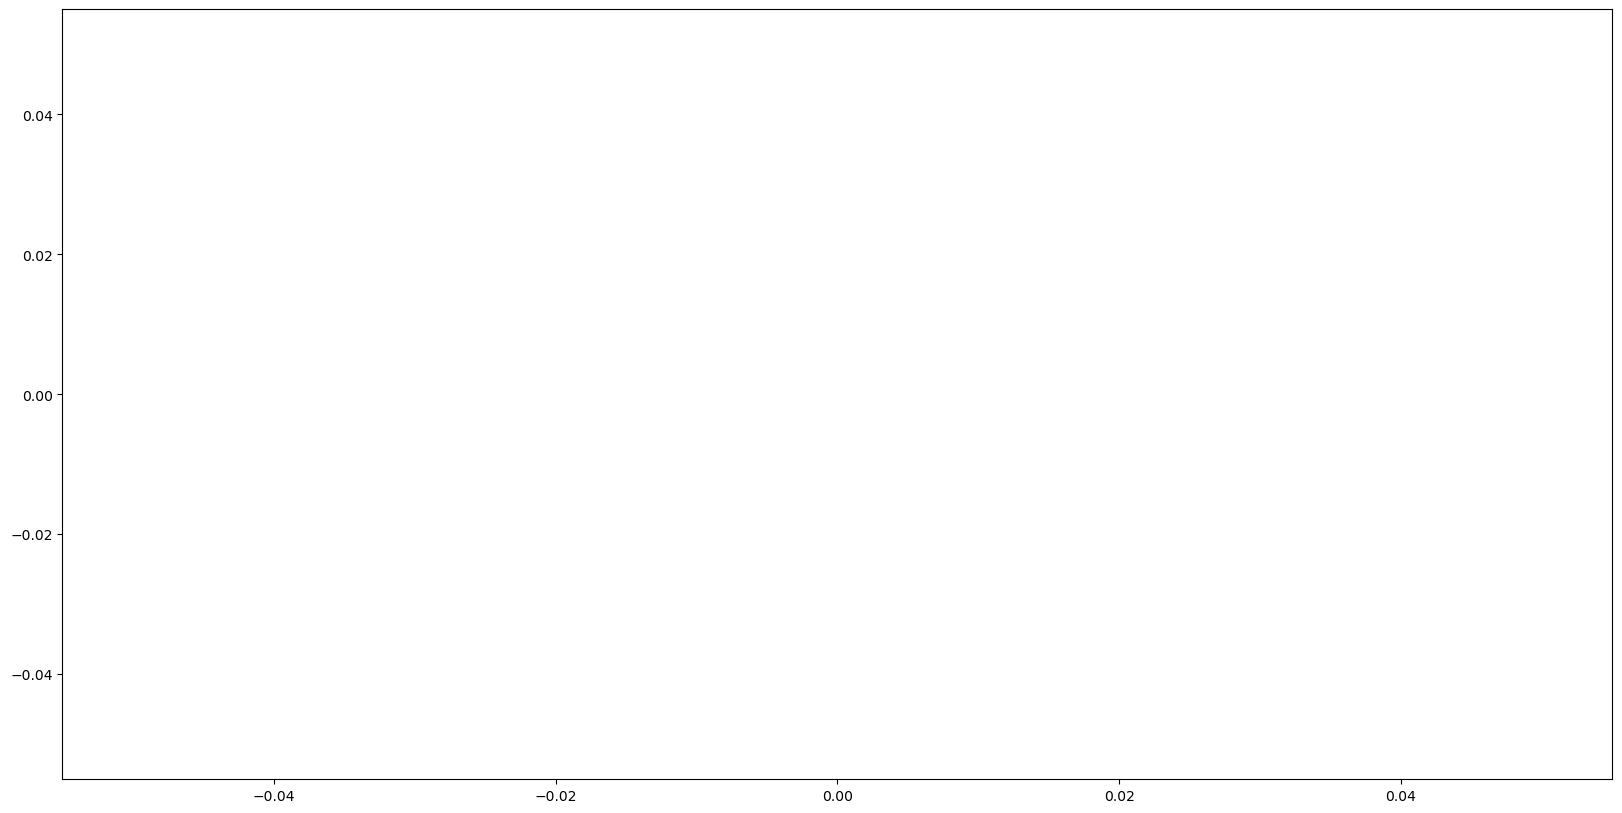

In [22]:
model_auto.predict().loc["09-Oct-2023 14:00:00":"09-Oct-2023 16:00:00"].plot()

In [20]:
result=model_auto.fit()
result.plot_forecast(100)
plt.show()

TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [11]:
model_auto = auto_arima(df1.IAQ[1:], 
                        exogenous=df1[['Temp','Humidnity','Pressure']][1:],
                        m=5,
                        max_order=None, max_p=8,max_q=8,max_d=3,max_P=4,max_Q,max_D=3,maxiter=50,alpha=0.05,n_jobs=-1,trend="ct",
                        out_of_sample_size=int(len(df1)*0.2)) 

SyntaxError: positional argument follows keyword argument (861734652.py, line 5)

In [23]:
from statsmodels.tsa.api import VAR
df_ret=df1[["Temp","Pressure","Humidnity"]][1:]
model_ret=VAR(df_ret)
model_ret.select_order(10)
result=model_ret.fit(ic='aic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Oct, 2023
Time:                     21:15:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.7707
Nobs:                     8175.00    HQIC:                  -11.9349
Log likelihood:           14624.3    FPE:                6.02113e-06
AIC:                     -12.0202    Det(Omega_mle):     5.81179e-06
--------------------------------------------------------------------
Results for equation Temp
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.631792         0.424049            1.490           0.136
L1.Temp               1.334285         0.016507           80.831           0.000
L1.Pressure          -0.001243         0.000476           -2.

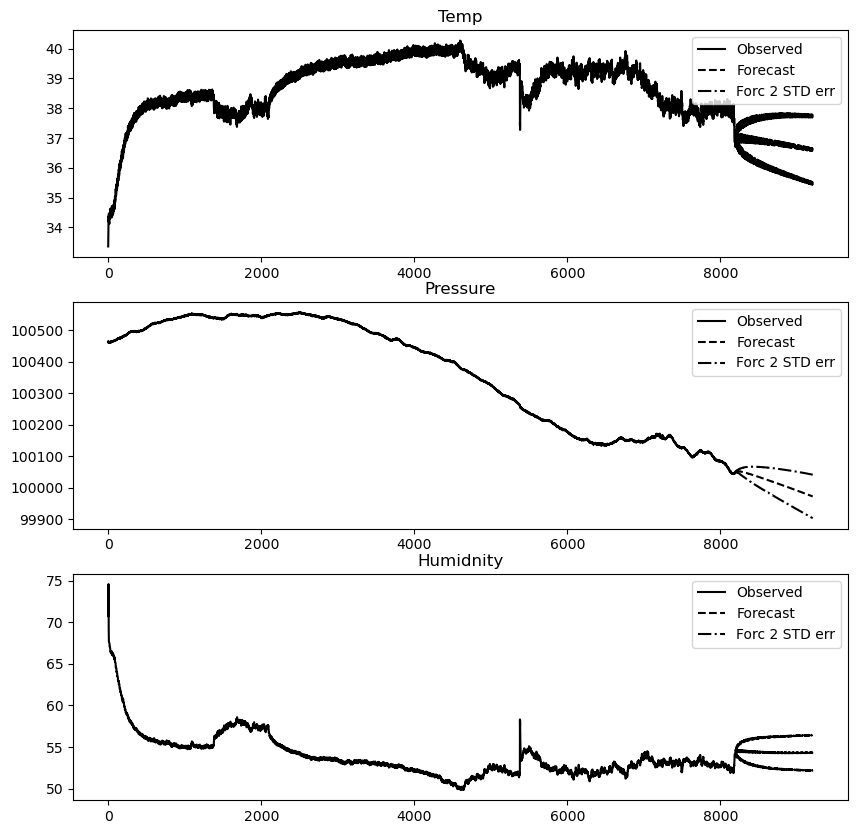

In [24]:
result.plot_forecast(1000)
plt.show()

In [28]:
results_auto = model_auto.fit()

# Step 6: Make forecasts and visualize the results
forecast_periods = 7  # Number of periods to forecast

forecast = results_auto.get_forecast(steps=forecast_periods)

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()


TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [21]:
forecast_periods = 100  # Adjust this to the number of periods you want to forecast
forecasted_values = result.forecast(result.Temp, steps=forecast_periods)
# Specify the starting point for forecasting
forecast_start = df_ret.index[-1] + pd.DateOffset(hours=1)

# Create a date range for the forecasted period
forecast_index = pd.date_range(start=forecast_start, periods=forecast_periods, freq='H')
forecasted_df = pd.DataFrame(forecasted_values, columns=["Temp", "Pressure", "Humidnity"], index=forecast_index)
# Specify the datetime for which you want to display the forecasted values
specific_time = pd.to_datetime("2023-10-12 00:00:00")

# Display forecasted values at the specific time
specific_forecast = forecasted_df.loc[specific_time]
print(specific_forecast)


AttributeError: 'VARResults' object has no attribute 'Temp'

In [22]:
attributes_and_methods = dir(result)

print(attributes_and_methods)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bmat_forc_cov', '_cache', '_char_mat', '_chol_sigma_u', '_cov_alpha', '_cov_sigma', '_forecast_vars', '_model_type', '_omega_forc_cov', '_zz', 'acf', 'acorr', 'aic', 'bic', 'bse', 'coefs', 'coefs_exog', 'cov_params', 'cov_ybar', 'dates', 'detomega', 'df_model', 'df_resid', 'endog', 'endog_lagged', 'exog', 'exog_names', 'fevd', 'fittedvalues', 'forecast', 'forecast_cov', 'forecast_interval', 'fpe', 'get_eq_index', 'hqic', 'info_criteria', 'intercept', 'intercept_longrun', 'irf', 'irf_errband_mc', 'irf_resim', 'is_stable', 'k_ar', 'k_exog', 'k_exog_user', 'k_trend', 'llf', 'long_run_effects', 'ma_rep', 'mean', 'model', 'mse', 'n_totobs', 'names', 

In [28]:
print(dir(result.forecast))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [41]:
result.forecast

<bound method VARProcess.forecast of <statsmodels.tsa.vector_ar.var_model.VARResults object at 0x0000022BF4111CC0>>

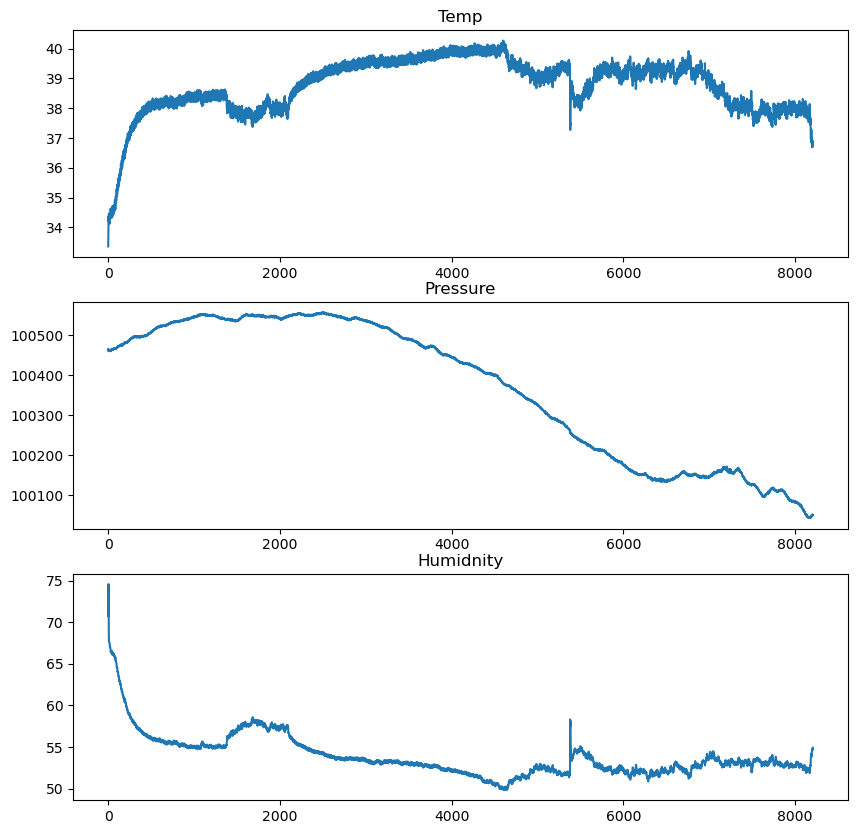

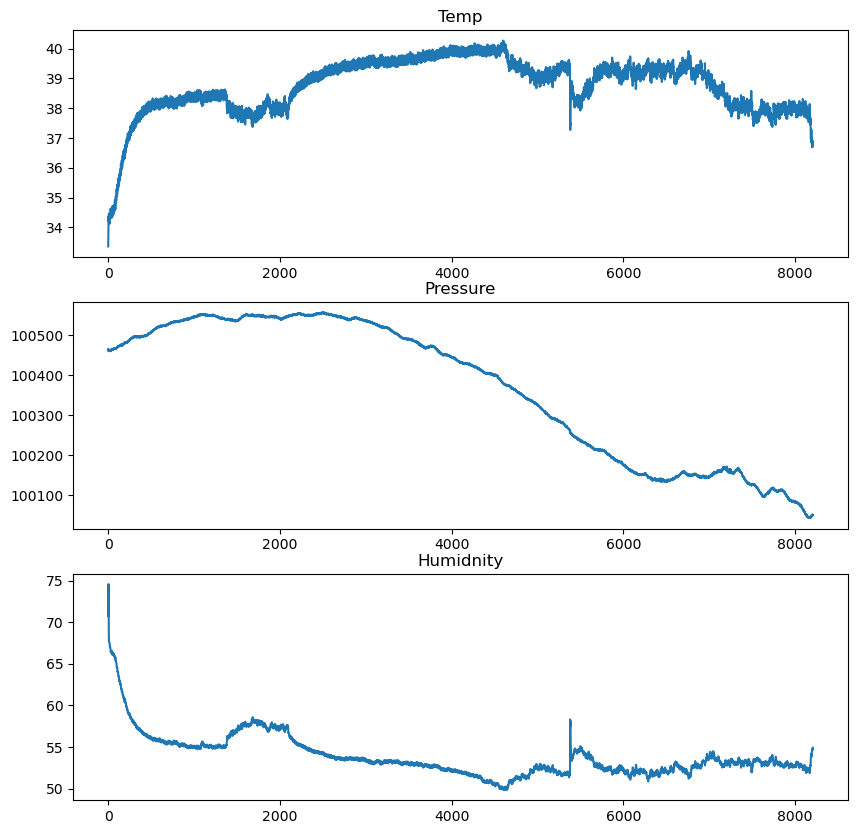

In [30]:
result.plot()

In [40]:

lagged_Values=train.values[-8:]
pred=result.forecast(y=lagged_Values,steps=12)

AttributeError: 'VARResults' object has no attribute 'get_prediction'